# Image classifiers

In [32]:
# Imports to be used through the notebook

import torch 
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np

import torch.optim as optim
import time

In [17]:
import torch 

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


## Data (MNIST)

In [29]:
# We define a transformation to apply to the items of the dataset (that are, by default, in PIL image format). The standardization will help with training.

MEAN_MNIST = (0.1307,)
STD_MNIST = (0.3081,)

transform_mnist = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(MEAN_MNIST, STD_MNIST)])


trainset = torchvision.datasets.MNIST(root='C:\\Users\\PabloHueso\\OneDrive - CompoSistemas, S.L\\Documents\\Master\\M2\\ENAC\\Adversarial-attacks\\Datasets', train=True,
                                        download=True, transform=transform_mnist)

testset = torchvision.datasets.MNIST(root='C:\\Users\\PabloHueso\\OneDrive - CompoSistemas, S.L\\Documents\\Master\\M2\\ENAC\\Adversarial-attacks\\Datasets', train=False,
                                       download=True, transform=transform_mnist)

#trainset.__getitem__(0)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:01<00:00, 6354518.97it/s] 


Extracting C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 263371.67it/s]


Extracting C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 2267469.69it/s]


Extracting C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 859215.62it/s]

Extracting C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\PabloHueso\OneDrive - CompoSistemas, S.L\Documents\Master\M2\ENAC\Adversarial-attacks\Datasets\MNIST\raw



In [30]:
batch_size = 512

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

print("Size train loader: ", len(trainloader), " | test loader: ", len(testloader))

Size train loader:  118  | test loader:  20


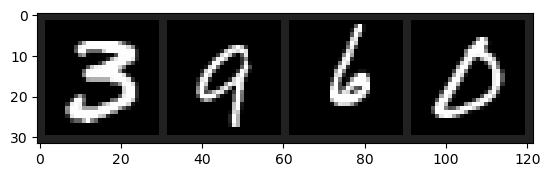

Labels:      3             9             6             0 

Image shape (number of channels, height, width): (1, 28, 28)


In [31]:
# functions to show an image
def imshow(img):
    img = img * STD_MNIST[0] + MEAN_MNIST[0]  # Proper unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')  # MNIST is grayscale + original tensor shape is (1,28,28) so  np.transpose(img, (1, 2, 0)) gets it to shape (28,28,1) 
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
images, labels = images[:4], labels[:4]

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Labels:     ','             '.join(f'{labels[j]}' for j in range(4)), '\n')
print(f'Image shape (number of channels, height, width): {tuple(images[0].shape)}')

In [28]:
np.ones((1, 2, 3)).shape


(1, 2, 3)

## First model

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, input_channels, output_channels):
        super().__init__()
        self.conv = nn.Conv2d(input_channels, 10, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(1690, output_channels)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv(x)))
        x = nn.Flatten()(x)
        x = self.fc(x)
        return x